# Exploring the Orderbook

Here, we'll explore different ways of playing with orderbook data

Bids:
╒════╤═════════╤════════════╤═════════╕
│    │   price │   quantity │   total │
╞════╪═════════╪════════════╪═════════╡
│  0 │  0.8586 │     5021.3 │  5021.3 │
├────┼─────────┼────────────┼─────────┤
│  1 │  0.8585 │    15991.7 │ 21013   │
├────┼─────────┼────────────┼─────────┤
│  2 │  0.8584 │     2328.1 │ 23341.1 │
├────┼─────────┼────────────┼─────────┤
│  3 │  0.8583 │    12161.3 │ 35502.4 │
├────┼─────────┼────────────┼─────────┤
│  4 │  0.8582 │    11728.7 │ 47231.1 │
╘════╧═════════╧════════════╧═════════╛

Asks:
╒════╤═════════╤═════════════════╤═════════════════╕
│    │   price │        quantity │           total │
╞════╪═════════╪═════════════════╪═════════════════╡
│  0 │  0.8587 │  1200.6         │  1200.6         │
├────┼─────────┼─────────────────┼─────────────────┤
│  1 │  0.8588 │ 10940.2         │ 12140.8         │
├────┼─────────┼─────────────────┼─────────────────┤
│  2 │  0.8589 │     1.26056e+06 │     1.2727e+06  │
├────┼─────────┼─────────────────┼─────────

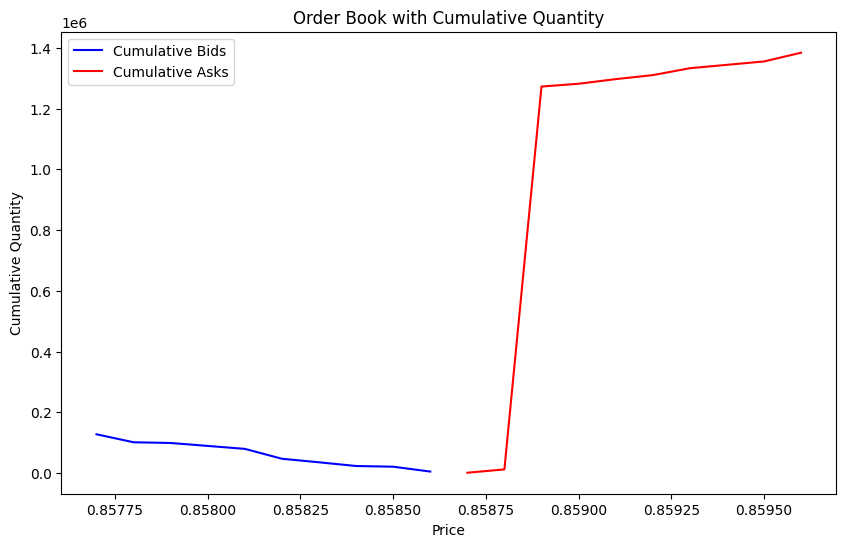

In [50]:
import ccxt
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt


binance = ccxt.binance()

symbol = 'MATIC/USDT'
orderbook = binance.fetch_order_book(symbol, limit=10) 

# Extract bid and ask data
bid_df = pd.DataFrame(data=orderbook['bids'], columns=["price", "quantity"])
ask_df = pd.DataFrame(data=orderbook['asks'], columns=["price", "quantity"])

# Add a 'total' column to represent the cumulative quantity at each price level
bid_df['total'] = bid_df['quantity'].cumsum()
ask_df['total'] = ask_df['quantity'].cumsum()

# Save bid_df to a CSV file
bid_df.to_csv("bids.csv", index=True)

# Display the bid and ask DataFrames using tabulate
print("Bids:")
print(tabulate(bid_df.head(), headers='keys', tablefmt='fancy_grid'))

print("\nAsks:")
print(tabulate(ask_df.head(), headers='keys', tablefmt='fancy_grid'))

# Visualize the Order Book with Cumulative Quantity
plt.figure(figsize=(10, 6))
plt.plot(bid_df['price'], bid_df['total'], label='Cumulative Bids', color='blue')
plt.plot(ask_df['price'], ask_df['total'], label='Cumulative Asks', color='red')
plt.title('Order Book with Cumulative Quantity')
plt.xlabel('Price')
plt.ylabel('Cumulative Quantity')
plt.legend()
plt.show()

In [51]:
# Display summary statistics for bid prices
bids_summary = bid_df['price'].describe().reset_index() # Describe returns a series, we need a dataframe to use tabulate
print("\nBids Summary:")
print(tabulate(bids_summary, headers='keys', tablefmt='fancy_grid'))

# Display summary statistics for ask prices
asks_summary = ask_df['price'].describe().reset_index()
print("\nAsks Summary:")
print(tabulate(asks_summary, headers='keys', tablefmt='fancy_grid'))


Bids Summary:
╒════╤═════════╤══════════════╕
│    │ index   │        price │
╞════╪═════════╪══════════════╡
│  0 │ count   │ 10           │
├────┼─────────┼──────────────┤
│  1 │ mean    │  0.85815     │
├────┼─────────┼──────────────┤
│  2 │ std     │  0.000302765 │
├────┼─────────┼──────────────┤
│  3 │ min     │  0.8577      │
├────┼─────────┼──────────────┤
│  4 │ 25%     │  0.857925    │
├────┼─────────┼──────────────┤
│  5 │ 50%     │  0.85815     │
├────┼─────────┼──────────────┤
│  6 │ 75%     │  0.858375    │
├────┼─────────┼──────────────┤
│  7 │ max     │  0.8586      │
╘════╧═════════╧══════════════╛

Asks Summary:
╒════╤═════════╤══════════════╕
│    │ index   │        price │
╞════╪═════════╪══════════════╡
│  0 │ count   │ 10           │
├────┼─────────┼──────────────┤
│  1 │ mean    │  0.85915     │
├────┼─────────┼──────────────┤
│  2 │ std     │  0.000302765 │
├────┼─────────┼──────────────┤
│  3 │ min     │  0.8587      │
├────┼─────────┼──────────────┤
│  4 │ 25%

## Calculating Metrics from the Orderbook data

In [52]:
# Calculate Bid-Ask Spread
bid_ask_spread = ask_df.iloc[0]['price'] - bid_df.iloc[0]['price']
print("Bid-Ask Spread: ", bid_ask_spread)

# Find the maximum quantity and corresponding price in bid_df
max_bid_quantity = bid_df['quantity'].max()
max_bid_price = bid_df.loc[bid_df['quantity'].idxmax()]['price']
print("Max Bid Quantity: ", max_bid_quantity)
print("Price at Max Bid Quantity: ", max_bid_price)

# Find the maximum quantity and corresponding price in ask_df
max_ask_quantity = ask_df['quantity'].max()
max_ask_price = ask_df.loc[ask_df['quantity'].idxmax()]['price']
print("Max Ask Quantity: ", max_ask_quantity)
print("Price at Max Ask Quantity: ", max_ask_price)

total_bids = bid_df['quantity'].sum()
total_asks = ask_df['quantity'].sum()

orderbook_imbalance = total_bids - total_asks
print("Orderbook Imbalance: ", orderbook_imbalance)

depth_ratio = total_bids / total_asks
print("Depth Ratio: ", depth_ratio)



Bid-Ask Spread:  9.999999999998899e-05
Max Bid Quantity:  32518.7
Price at Max Bid Quantity:  0.8581
Max Ask Quantity:  1260561.2
Price at Max Ask Quantity:  0.8589
Orderbook Imbalance:  -1256319.8
Depth Ratio:  0.09229540517826364
